# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import matplotlib.cm as cm
import matplotlib.pylab as plt
from IPython.display import display
pd.set_option('expand_frame_repr', True)
pd.set_option('precision',3)

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000,440.000,440.000,440.000,440.000,440.000
mean,12000.298,5796.266,7951.277,3071.932,2881.493,1524.870
std,12647.329,7380.377,9503.163,4854.673,4767.854,2820.106
min,3.000,55.000,3.000,25.000,3.000,3.000
25%,3127.750,1533.000,2153.000,742.250,256.750,408.250
50%,8504.000,3627.000,4755.500,1526.000,816.500,965.500
75%,16933.750,7190.250,10655.750,3554.250,3922.000,1820.250
max,112151.000,73498.000,92780.000,60869.000,40827.000,47943.000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
indices = [3, 100, 25]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,11594,7779,12144,3252,8035,3029
2,16165,4230,7595,201,4003,57


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [4]:
# from tabulate import tabulate
# print(tabulate(samples.apply(lambda x: x - data.mean(), axis=1),
#                headers=('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'),
#                tablefmt='pipe'))

**Answer:**

__Sample 3's difference from the sample population's mean:__

| Sample #   |    Fresh |     Milk |   Grocery |    Frozen |   Detergents_Paper |   Delicatessen |
|---:|---------:|---------:|----------:|----------:|-------------------:|---------------:|
| 3 | 1264.7   | -4600.27 | -3730.28  |  3332.07  |           -2374.49 |         263.13 |

Sample 3 spends above the average on fresh, groceries, and delicatessen.  They also spend noticeably less on milk and fresh items.  This customer looks like a cafe that makes drinks such as fruit smoothies.


__Sample 100's difference from the sample population's mean:__

| Sample #   |    Fresh |     Milk |   Grocery |    Frozen |   Detergents_Paper |   Delicatessen |
|---:|---------:|---------:|----------:|----------:|-------------------:|---------------:|
|  100 | -406.298 |  1982.73 |  4192.72  |   180.068 |            5153.51 |        1504.13 |

Sample 100 spends above average on all the categories except for fresh. Moreover, they spend noticeably more on grocery and detergents paper compared to the average.  This customer looks like retailer that targets weekly shopping. 


__Sample 35's difference from the sample population's mean:__


| Sample #   |    Fresh |     Milk |   Grocery |    Frozen |   Detergents_Paper |   Delicatessen |
|---:|---------:|---------:|----------:|----------:|-------------------:|---------------:|
|  25 | 4164.7   | -1566.27 |  -356.277 | -2870.93  |            1121.51 |       -1467.87 |

Sample 25 spends above average on fresh and detergents paper. Moreover, they spend noticeably more on fresh compared to the average.  This customer looks like a market that targets shoppers that can pickup detergents paper (essentials) while shopping for fresh food.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [6]:
def assess_relevance(df, clf):
    results = []
    for col in df:
        result = {}
        new_target = df[col]
        new_df = df.copy().drop(col, axis=1)
        
        features = new_df.columns.tolist()
        X_train, X_test, y_train, y_test = train_test_split(new_df, new_target, test_size=0.25, random_state=99)
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        result['R^2'] = score
        result['features'] = features
        result['target'] = col
        results.append(result)
    return results

dtr = DecisionTreeRegressor(random_state=99)

results = assess_relevance(data, dtr)

pd.DataFrame(results).sort_values(by='R^2', ascending=False)

,R^2,features,target
4,0.815,"[Fresh, Milk, Grocery, Frozen, Delicatessen]",Detergents_Paper
2,0.730,"[Fresh, Milk, Frozen, Detergents_Paper, Delica...",Grocery
1,0.229,"[Fresh, Grocery, Frozen, Detergents_Paper, Del...",Milk
5,-0.596,"[Fresh, Milk, Grocery, Frozen, Detergents_Paper]",Delicatessen
3,-0.680,"[Fresh, Milk, Grocery, Detergents_Paper, Delic...",Frozen
0,-0.709,"[Milk, Grocery, Frozen, Detergents_Paper, Deli...",Fresh


In [7]:
for category in data:
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(category, axis=1)

    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[category], random_state=99, train_size=0.75)

    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=99)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print('Category: {}\nR^2: {}\n'.format(category, score))

Category: Fresh
R^2: -0.709446980071

Category: Milk
R^2: 0.229325620706

Category: Grocery
R^2: 0.729561220056

Category: Frozen
R^2: -0.680407230522

Category: Detergents_Paper
R^2: 0.815003969615

Category: Delicatessen
R^2: -0.595980601575



### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict each feature. The reported prediction score for Detergents_Paper had the highest R^2 (0.815). Based on my exploration, I found that the model failed to fit the data when the following were used:

- Delicatessen
- Frozen
- Fresh

Based on our analysis, we can identifying customers' spending habits
for groceries and detergents papers well. However, these features are not necessary to identifying spending habits.  For example, products that have low coefficient of determination may have information that would be helpful in other products not included in the list.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

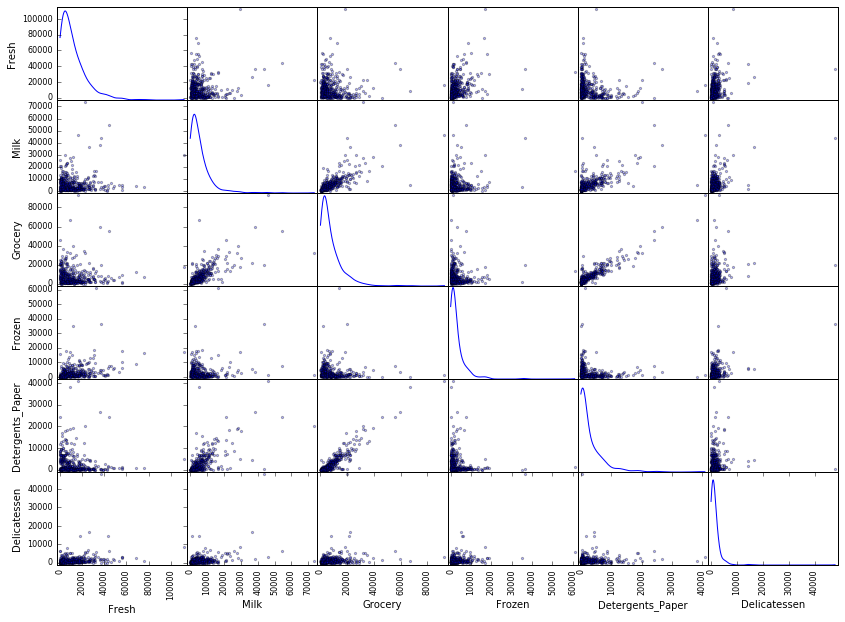

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Grocery and Detergents_Paper exhibit some degree of correlation and confirms my suspicions about the relevance of the features mentioned in question 2. Both Grocery and Detergents_Paper have density skewed towards the right. However, Grocery is slightly less distributed towards the right compared to Detergents_Paper.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

In [9]:
np.log(data).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000,440.000,440.000,440.000,440.000,440.000
mean,8.731,8.121,8.441,7.301,6.786,6.665
std,1.480,1.081,1.116,1.285,1.721,1.311
min,1.099,4.007,1.099,3.219,1.099,1.099
25%,8.048,7.335,7.675,6.610,5.548,6.012
50%,9.048,8.196,8.467,7.330,6.705,6.873
75%,9.737,8.880,9.274,8.176,8.274,7.507
max,11.628,11.205,11.438,11.016,10.617,10.778


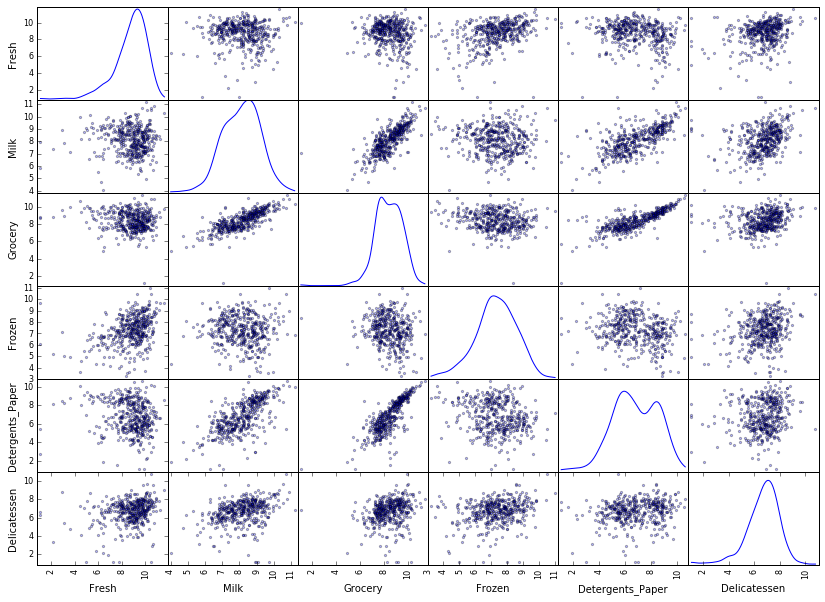

In [10]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.493,7.087,8.348,8.765,6.229,7.489
1,9.358,8.959,9.405,8.087,8.992,8.016
2,9.691,8.350,8.935,5.303,8.295,4.043


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
from collections import Counter


# Select the indices for data points you wish to remove
outliers_array  = np.array([])

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    outliers_array = np.append(outliers_array, log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)

# OPTIONAL: Select the indices for data points you wish to remove
outliers = np.unique(outliers_array)
over_lapping_outliers = outliers_array
cnt_outliers = Counter(outliers_array)
outliers_that_appear_more_than_once = [k for k, v in cnt_outliers.iteritems() if v > 1]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers_that_appear_more_than_once]).reset_index(drop = True)
# log_data.iloc[log_data.index.difference(outliers), :]

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.443,9.950,10.733,3.584,10.095,7.261
66,2.197,7.336,8.912,5.165,8.151,3.296
81,5.389,9.163,9.575,5.645,8.964,5.050
95,1.099,7.979,8.741,6.087,5.407,6.564
96,3.135,7.869,9.002,4.977,8.262,5.380
128,4.942,9.088,8.249,4.956,6.968,1.099
171,5.298,10.161,9.894,6.479,9.079,8.740
193,5.193,8.156,9.918,6.866,8.634,6.501
218,2.890,8.923,9.629,7.159,8.476,8.760
304,5.081,8.917,10.118,6.425,9.374,7.787


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040,11.205,10.377,6.895,9.907,6.806
98,6.221,4.718,6.657,6.797,4.025,4.883
154,6.433,4.007,4.920,4.317,1.946,2.079
356,10.030,4.898,5.384,8.057,2.197,6.306


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923,7.036,1.099,8.391,1.099,6.882
154,6.433,4.007,4.920,4.317,1.946,2.079


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432,9.663,9.724,3.497,8.847,6.071
57,8.597,9.204,9.258,3.638,8.932,7.156
65,4.443,9.950,10.733,3.584,10.095,7.261
145,10.001,9.034,10.457,3.738,9.441,8.396
175,7.759,8.968,9.382,3.951,8.342,7.437
264,6.978,9.178,9.645,4.111,8.696,7.143
325,10.396,9.728,9.520,11.016,7.148,8.632
420,8.402,8.569,9.490,3.219,8.827,7.239
429,9.060,7.467,8.183,3.850,4.431,7.824
439,7.933,7.437,7.828,4.174,6.168,3.951


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923,7.036,1.099,8.391,1.099,6.882
161,9.428,6.292,5.645,6.996,1.099,7.711


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197,7.336,8.912,5.165,8.151,3.296
109,7.249,9.725,10.275,6.512,6.729,1.099
128,4.942,9.088,8.249,4.956,6.968,1.099
137,8.035,8.997,9.022,6.494,6.581,3.584
142,10.520,8.875,9.018,8.005,2.996,1.099
154,6.433,4.007,4.920,4.317,1.946,2.079
183,10.515,10.691,9.912,10.506,5.476,10.778
184,5.790,6.822,8.457,4.304,5.811,2.398
187,7.799,8.987,9.192,8.743,8.149,1.099
203,6.368,6.529,7.703,6.151,6.861,2.890


/usr/local/lib/python2.7/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


In [13]:
print("Shape before: {}".format(data.shape))
print("Shape after: {}".format(good_data.shape))
print("We dropped: {} samples".format(data.shape[0] - good_data.shape[0]))
print([int(i) for i in outliers_that_appear_more_than_once])

Shape before: (440, 6)
Shape after: (435, 6)
We dropped: 5 samples
[128, 154, 65, 66, 75]


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Base on my analysis of all products, 5 customers indexed at :[128, 154, 65, 66, 75] are dropped from the dataset. I believe these customers should be removed because they overlap as an outlier with at least one other product.  Since 5 samples are relatively small compared to the total size (440), I feel comfortable dropping these outliers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

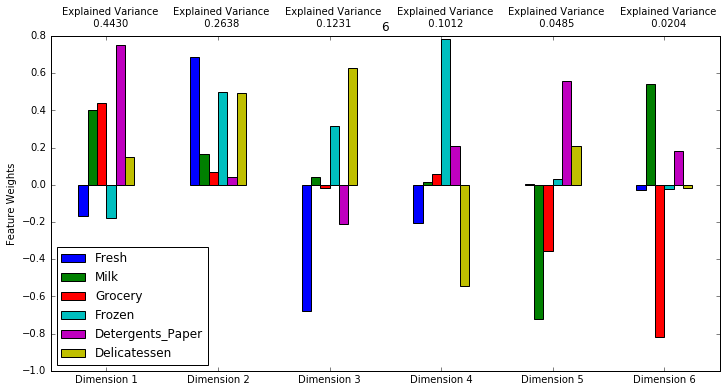

In [14]:
from sklearn.decomposition import PCA
# Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca, 6)

In [15]:
np.sum(pca.explained_variance_ratio_[:4])

0.93109010995096142

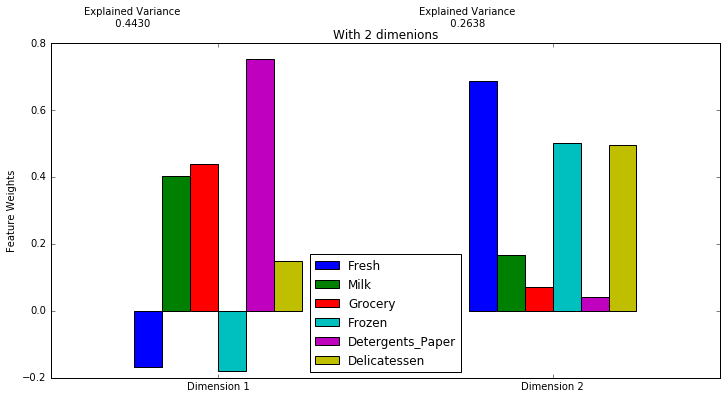

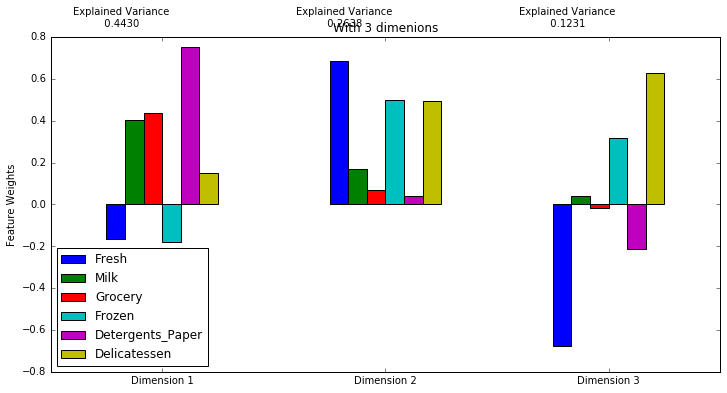

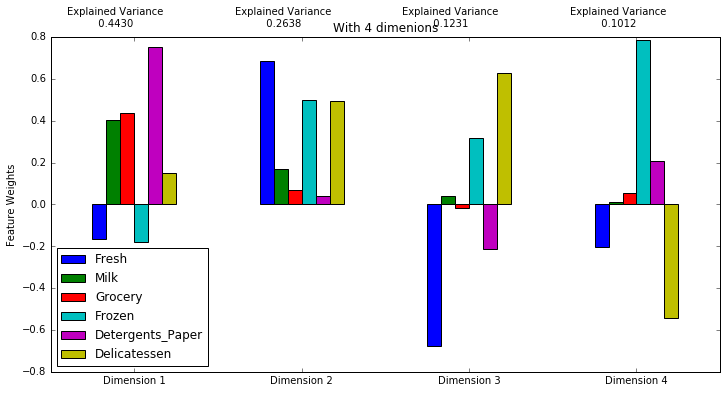

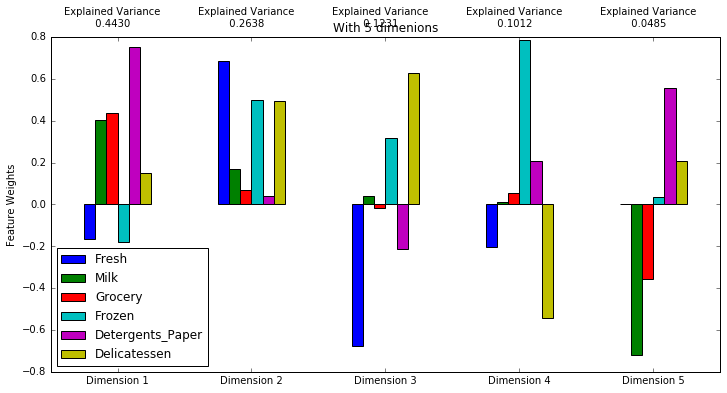

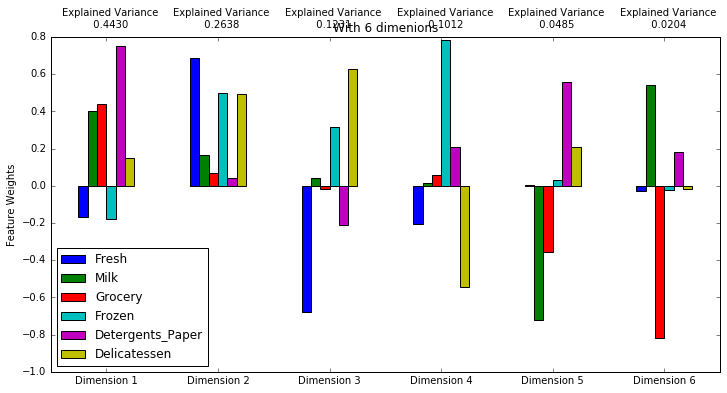

In [16]:
# Loop through PCA with each possible dimension

def explore_pca(data, range_of_components):
    for i in range_of_components:
        pca = PCA(n_components=i).fit(data)
        pca_samples = pca.transform(samples)
        pca_results = rs.pca_results(good_data, pca, "\nWith {} dimenions".format(i))
        
explore_pca(good_data, [2, 3, 4, 5, 6])

In [17]:
pca_results.T

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
Explained Variance,0.443,0.264,0.123,0.101,0.049,0.020
Fresh,-0.168,0.686,-0.677,-0.204,0.003,-0.029
Milk,0.401,0.167,0.040,0.013,-0.719,0.540
Grocery,0.438,0.071,-0.019,0.056,-0.355,-0.821
Frozen,-0.178,0.500,0.315,0.785,0.033,-0.021
Detergents_Paper,0.751,0.042,-0.212,0.210,0.558,0.182
Delicatessen,0.150,0.494,0.629,-0.542,0.209,-0.020


In [18]:
pca_results.iloc[:, 1:].T.mean()

Dimension 1    0.233
Dimension 2    0.327
Dimension 3    0.013
Dimension 4    0.053
Dimension 5   -0.045
Dimension 6   -0.028
dtype: float64

In [19]:
# print(tabulate(pca_results.T, 
#          headers=('Dimension 1', 'Dimension 2', 'Dimension 3',
#                   'Dimension 4', 'Dimension 5', 'Dimension 6'),
#                tablefmt='pipe'))

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

Here a correlation value above 0.5 is deemed important. 

|                    |   Dimension 1 |   Dimension 2 |   Dimension 3 |   Dimension 4 |   Dimension 5 |   Dimension 6 |
|:-------------------|--------------:|--------------:|--------------:|--------------:|--------------:|--------------:|
| Explained Variance |        0.443  |        0.2638 |        0.1231 |        0.1012 |        0.0485 |        0.0204 |
| Fresh              |       -0.1675 |    __0.6859__ |   __-0.6774__ |       -0.2043 |        0.0026 |       -0.0292 |
| Milk               |        0.4014 |        0.1672 |        0.0402 |        0.0128 |   __-0.7192__ |    __0.5402__ |
| Grocery            |        0.4381 |        0.0707 |       -0.0195 |        0.0557 |       -0.3554 |   __-0.8205__ |
| Frozen             |       -0.1782 |    __0.5005__ |        0.315  |    __0.7854__ |        0.0331 |       -0.0205 |
| Detergents_Paper   |    __0.7514__ |        0.0424 |       -0.2117 |        0.2096 |    __0.5582__ |        0.1824 |
| Delicatessen       |        0.1499 |        0.4941 |    __0.6286__ |   __-0.5423__ |        0.2092 |       -0.0197 |

The explained variance for the first dimension was .443 and .2638 for the second (a total of 0.7068 when combined). In the first four components the total explained variance was 0.931.
Using the visualization, table, and correlation value of .5 provided above we see:

- The first principal component increases with spending on Detergents_Paper. This component can be viewed as a measure of the spending on Detergents_Paper category. Since Detergents_Paper has the largest correlation score (.7514), the 1st this principal component is __primarily__ a measure of the category Detergents_Paper.


- The second component increases with spending on Fresh and Frozen. This component can be viewed as a measure of the spending on Fresh and Frozen categories. Since Fresh has largest correlation score (0.6859), the 2nd principal component is __primarily__ a measure of the category Fresh. This suggests that customers spending on Fresh also tend to spend on Frozen.


- The third component increases with spending on Delicatessen and decreases with spending on Fresh. This component can be viewed as a measure of the spending on the Delicatessen and Fresh categories. Since Fresh has largest correlation score (-0.6774), the 3rd principal component is __primarily__ a measure of the category Fresh.  However, Delicatessen is not too far behind.


- The fourth component increases with spending on Frozen and decreases with Delicatessen (-0.5423). This component can be viewed as a measure of the spending on Frozen and Delicatessen categories. Since Frozen has largest correlation score (0.7854), the 4th principal component is __primarily__ a measure of the category Frozen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
print("Samples before log transformation: \n")
print(pca.fit_transform(samples))

Samples before log transformation: 

[[ -6.54515347e+03  -2.24481463e+03   1.07505673e-12]
 [  6.75918055e+03  -2.03811588e+03   1.07505673e-12]
 [ -2.14027079e+02   4.28293051e+03   1.07505673e-12]]


In [21]:
print("Sample after log tranformation: \n")
print(pca.fit_transform(log_samples))

Sample after log tranformation: 

[[ -2.07645959e+00   1.58840291e+00   1.36676040e-15]
 [ -1.18482656e+00  -1.90694465e+00   1.36676040e-15]
 [  3.26128616e+00   3.18541742e-01   1.36676040e-15]]


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [22]:
# Fit PCA to the good data using only two dimensions
pca2 = PCA(n_components=2).fit(good_data)

# Apply a PCA transformation the good data
reduced_data = pca2.transform(good_data)

# Apply a PCA transformation to the sample log-data
reduced_pca_samples = pca2.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [23]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(reduced_pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.155,1.405
1,2.358,1.739
2,1.229,-1.554


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

### K-means
#### Advantages
- Works well on many realistic data sets
- Relatively fast
- Easy to implement (you can randomly assign the location of centriods)
- Easy to understand
- Works well in datasets that have with clusters that are roughly equally sized and shaped roughly regularly.

#### Weaknesses
- Not guaranteed to converge
- The final cluster configuration to which it converges is not in general unique and depends on the initial centroid locations.
- Can only be applied when the data points lie in a Euclidean space, failing for more complex types of data
- Can be slow for large numbers of samples
- Dependent on initialization
    - The more clusters you have, the more local minima you find
- finite number of configurations

### Gaussian Mixture Model
Can be viewed as an extension of the ideas behind KMeans, but can also be a powerful tool for estimation beyond simple clustering.

#### Advantages
- Familiarity (similar to K-means)
- Can account of various cluster shapes (flexible)
- Works with any probability distribution
- Can assign probabilistic cluster assignment
- Monotonically non-decreasing likelihood
- Does not converge
- Will not diverge (well behaved)
- Infinite number of configurations (steps)

##### Weaknesses
- Can get stuck when assigning clusters
    - multiple ways to assign things to clusters
- Local optimum problem
- Learners can get really complex

Based on this use case, I select K-means for the exercise because its relatively fast and easy to understand (good for the client).
    
Sources: [Visualizing-k-means-clustering](http://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

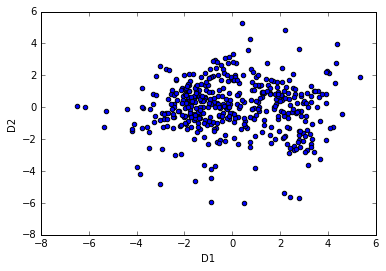

In [24]:
from matplotlib.pylab import plt
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'])
plt.xlabel('D1')
plt.ylabel('D2')

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def create_clusters_kmeans(n, reduced_data, reduced_pca_samples):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n, random_state=99).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print('K-Means with {} clusters: Mean silhouette coefficient: {:.3f}'.format(n, score))
    
def create_clusters_gmm(n, reduced_data, reduced_pca_samples):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n, covariance_type='tied', random_state=99).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print('GMM     with {} clusters: Mean silhouette coefficient: {:.3f}'.format(n, score))

range_of_clusters = [2, 3, 4, 5, 6, 7, 8]
for n in range_of_clusters:
    create_clusters_kmeans(n, reduced_data, reduced_pca_samples)
    create_clusters_gmm(n, reduced_data, reduced_pca_samples)
    print('-' * 90)

K-Means with 2 clusters: Mean silhouette coefficient: 0.426
GMM     with 2 clusters: Mean silhouette coefficient: 0.423
------------------------------------------------------------------------------------------
K-Means with 3 clusters: Mean silhouette coefficient: 0.397
GMM     with 3 clusters: Mean silhouette coefficient: 0.385
------------------------------------------------------------------------------------------
K-Means with 4 clusters: Mean silhouette coefficient: 0.332
GMM     with 4 clusters: Mean silhouette coefficient: 0.317
------------------------------------------------------------------------------------------
K-Means with 5 clusters: Mean silhouette coefficient: 0.352
GMM     with 5 clusters: Mean silhouette coefficient: 0.291
------------------------------------------------------------------------------------------
K-Means with 6 clusters: Mean silhouette coefficient: 0.366
GMM     with 6 clusters: Mean silhouette coefficient: 0.316
------------------------------------

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I tried both algorithm between 2 and 8 clusters. For both algorithms, clustering with 2 groups was the best for Kmeans (0.426) and GMM (0.423). As we increased the number of clusters we saw inconsistent results, therefore I doubt increasing the number of clusters beyond 8 will improve the silhouette scores.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

('For n_clusters =', 2, 'The average silhouette_score is :', 0.41174985627969979)


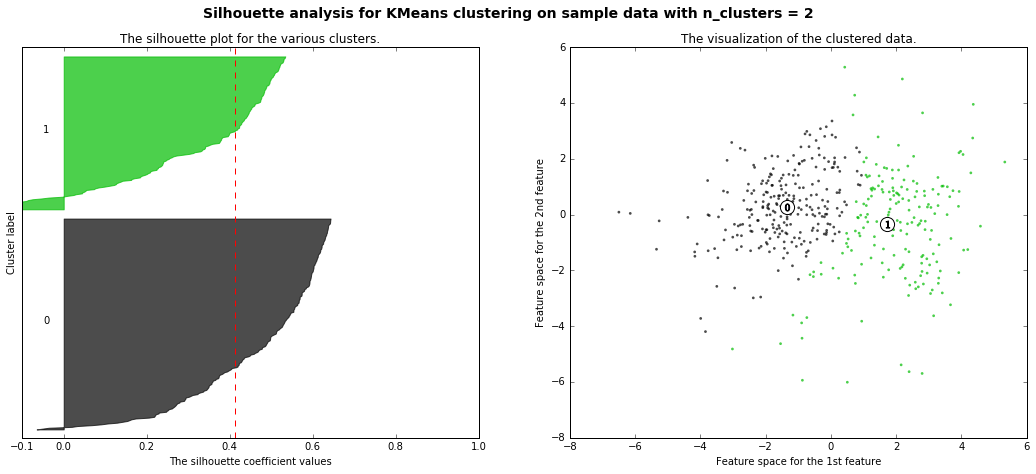

('For n_clusters =', 3, 'The average silhouette_score is :', 0.39699775228989492)


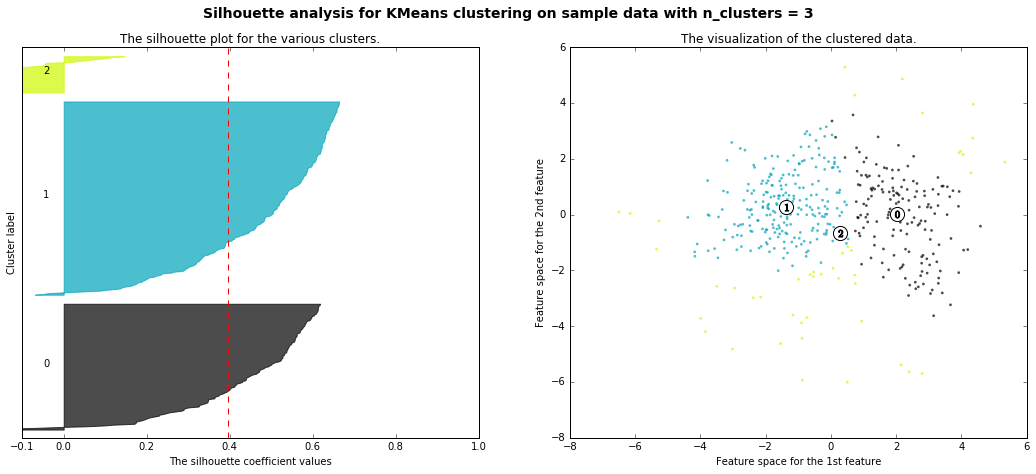

('For n_clusters =', 4, 'The average silhouette_score is :', 0.28867498655987428)


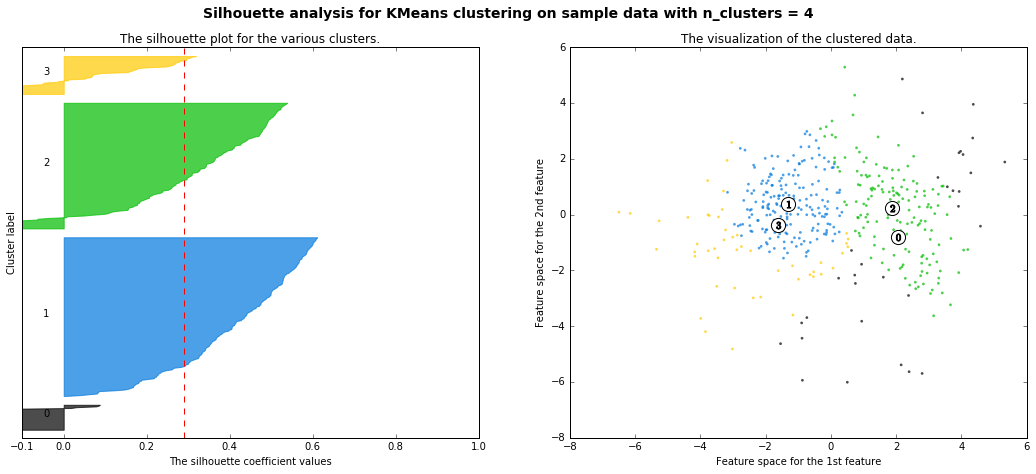

('For n_clusters =', 5, 'The average silhouette_score is :', 0.18821330630749533)


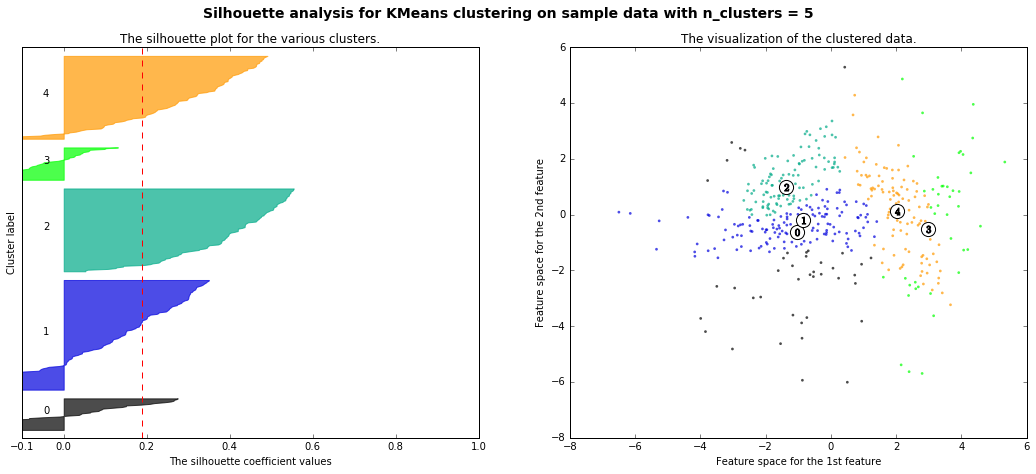

('For n_clusters =', 6, 'The average silhouette_score is :', 0.25264248863260691)


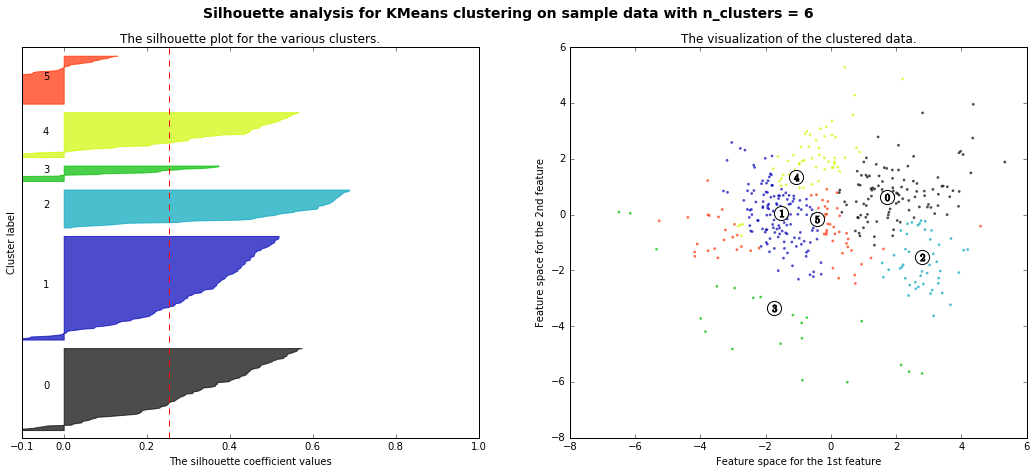

('For n_clusters =', 7, 'The average silhouette_score is :', 0.31192512391707777)


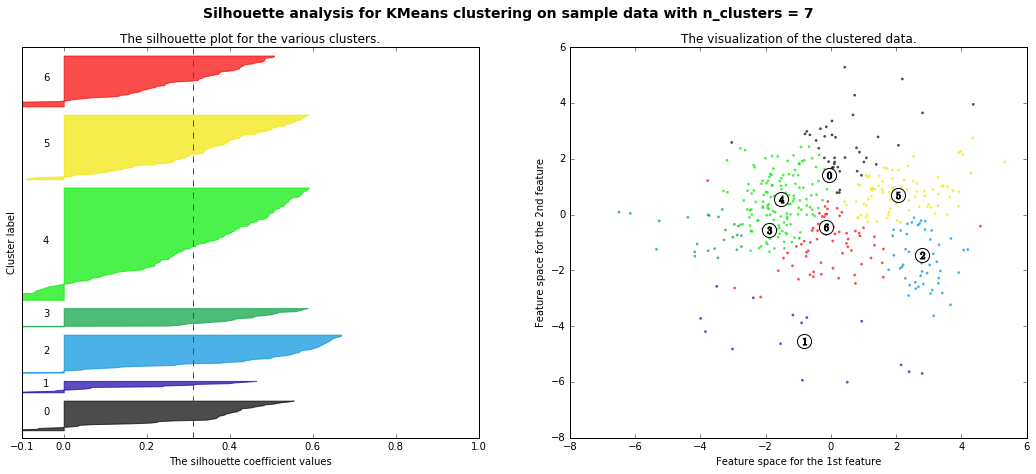

('For n_clusters =', 8, 'The average silhouette_score is :', 0.20427163680377861)


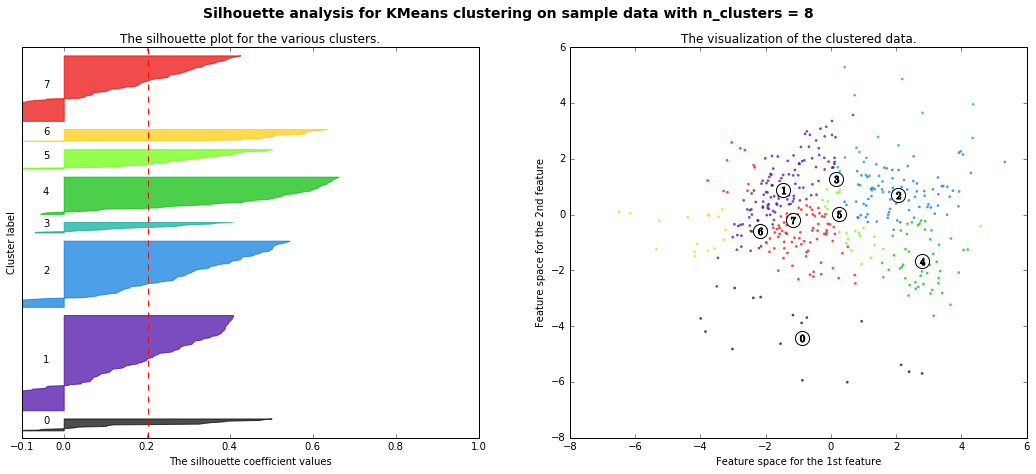

In [26]:
# From "Selecting the number of clusters with silhouette analysis on KMeans clustering"
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(reduced_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_eclusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GMM(n_clusters, covariance_type='full', random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
    centers = clusterer.means_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [27]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=99).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print('K-Means with {} clusters: Mean silhouette coefficient: {:.3f}'.format(2, score))

K-Means with 2 clusters: Mean silhouette coefficient: 0.426


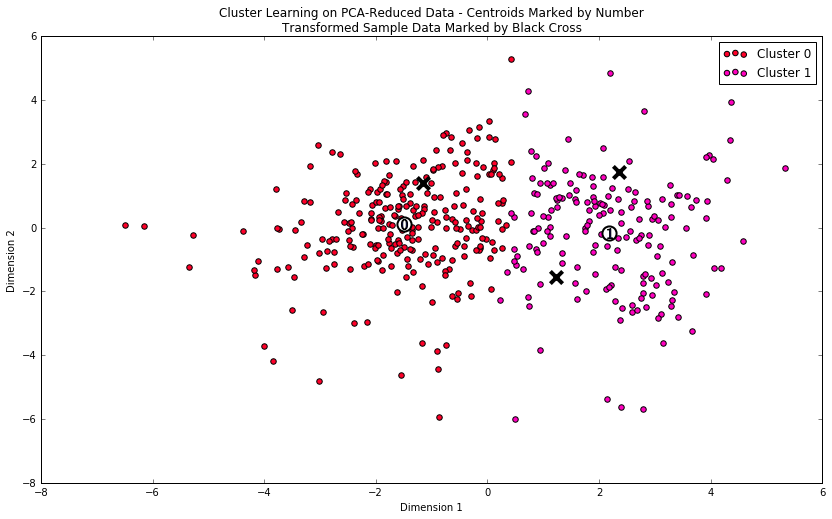

In [28]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [29]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000,440.000,440.000,440.000,440.000,440.000
mean,12000.298,5796.266,7951.277,3071.932,2881.493,1524.870
std,12647.329,7380.377,9503.163,4854.673,4767.854,2820.106
min,3.000,55.000,3.000,25.000,3.000,3.000
25%,3127.750,1533.000,2153.000,742.250,256.750,408.250
50%,8504.000,3627.000,4755.500,1526.000,816.500,965.500
75%,16933.750,7190.250,10655.750,3554.250,3922.000,1820.250
max,112151.000,73498.000,92780.000,60869.000,40827.000,47943.000


In [30]:
# Inverse transform the centers
log_centers = pca2.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

A customer assigned to Cluster 0 is spending more on Fresh and Frozen products compared to cluster 1. Whereas cluster 1 is spending more on Detergents_Paper and Milk.

When comparing the cluster centers to the statistical description of the dataset at the beginning, cluster 0 is spending the above median on Fresh and Frozen. Also, they are spending noticeably than the median on Detergents_Paper, Milk, and Grocery.

For cluster 1, customers are spending significantly more on Grocery (12079.0 vs 4755.5) relative to the median of the of the dataset at the beginning.   

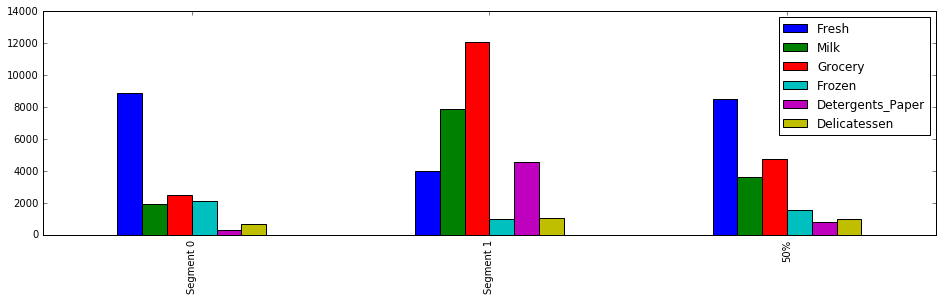

In [31]:
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4));

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [32]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

Yes, the predictions are consistent with the segments defined earlier. Sample 0 resemble specialized customers (below average in Detergents_Paper and Grocery) whereas stores 1 and 2 resemble multipurpose customers.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

I would recommend the wholesale distributor use one group determined by the clustering done above. For example selecting group A and splitting that group in half, giving one of the subsets delivery service from 5 days a week and giving group two delivery service 3 days a week. The distributor can identify who it affects the most by comparing the "gains/outcomes" between the split of group A. 

The change in delivery services would not affect all customers equally, making delivery service from 5 days a week to 3 days a week would benefit distributors who purchase fresh and frozen foods.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

The wholesale distributor can add the labels we assigned via clustering the data. For example, segment 0 and 1 can now be added as features in their supervised learner. If we had a clustering model that assigned more than 2 labels, those also could be added to the feature set.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

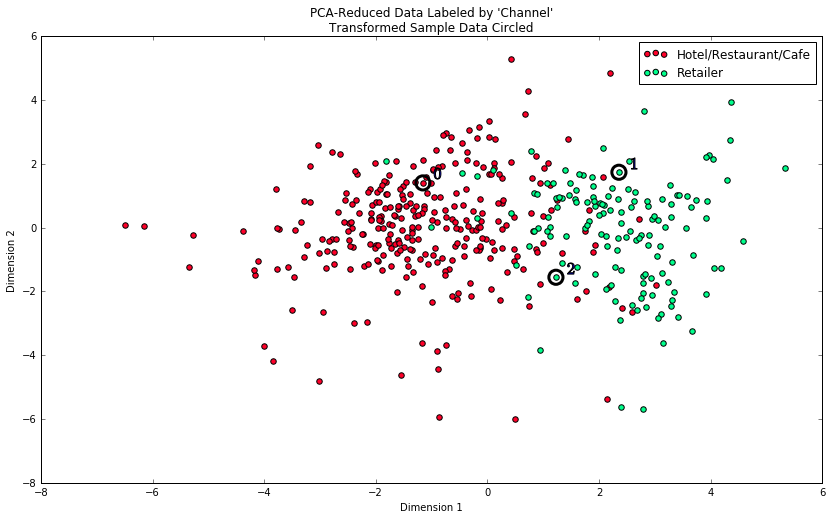

In [33]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, [int(i) for i in outliers_that_appear_more_than_once], reduced_pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

I think the clustering algorithm and number of clusters you've chosen compare to this underlying distribution does well. If we used the Kmeans learner, I would not be confident about assigning probabilities to the labels. If I were to do that, I would suggest using a GMM instead of K-means. I consider these classifications as consistent with my earlier definitions. Hotels/Restaurants/Cafes would mean more stock and represent what I called as megastores, while Retailers resemble what I called farmer markets.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.